Data Collection & Wrangling [Slide 4 - 5]

In [46]:
import pandas as pd

# Load dataset from GitHub
url = 'https://raw.githubusercontent.com/chuksoo/IBM-Data-Science-Capstone-SpaceX/main/Spacex.csv'
df = pd.read_csv(url)

# Clean column names (remove spaces)
df.columns = df.columns.str.strip().str.replace(' ', '_')

# Display first few rows neatly
from IPython.display import display
display(df.head())

# Check for missing values
print("\nMissing Values:\n", df.isnull().sum())

# Drop missing values (if any)
df.dropna(inplace=True)

# Convert categorical columns to proper type
categorical_cols = ['Launch_Site', 'Orbit', 'Mission_Outcome', 'Landing__Outcome']
df[categorical_cols] = df[categorical_cols].astype('category')

# Display dataset summary neatly
print("\nDataset Info:")
df.info()

,Date,Time_(UTC),Booster_Version,Launch_Site,Payload,PAYLOAD_MASS__KG_,Orbit,Customer,Mission_Outcome,Landing__Outcome
0,2010-04-06,18:45:00,F9 v1.0 B0003,CCAFS LC-40,Dragon Spacecraft Qualification Unit,0,LEO,SpaceX,Success,Failure (parachute)
1,2010-08-12,15:43:00,F9 v1.0 B0004,CCAFS LC-40,"Dragon demo flight C1, two CubeSats, barrel of...",0,LEO (ISS),NASA (COTS) NRO,Success,Failure (parachute)
2,2012-05-22,7:44:00,F9 v1.0 B0005,CCAFS LC-40,Dragon demo flight C2,525,LEO (ISS),NASA (COTS),Success,No attempt
3,2012-08-10,0:35:00,F9 v1.0 B0006,CCAFS LC-40,SpaceX CRS-1,500,LEO (ISS),NASA (CRS),Success,No attempt
4,2013-01-03,15:10:00,F9 v1.0 B0007,CCAFS LC-40,SpaceX CRS-2,677,LEO (ISS),NASA (CRS),Success,No attempt



Missing Values:
 Date                 0
Time_(UTC)           0
Booster_Version      0
Launch_Site          0
Payload              0
PAYLOAD_MASS__KG_    0
Orbit                0
Customer             0
Mission_Outcome      0
Landing__Outcome     0
dtype: int64

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Date               101 non-null    object  
 1   Time_(UTC)         101 non-null    object  
 2   Booster_Version    101 non-null    object  
 3   Launch_Site        101 non-null    category
 4   Payload            101 non-null    object  
 5   PAYLOAD_MASS__KG_  101 non-null    int64   
 6   Orbit              101 non-null    category
 7   Customer           101 non-null    object  
 8   Mission_Outcome    101 non-null    category
 9   Landing__Outcome   101 non-null    category
dtypes: category(4), int64(1), 

EDA & SQL Analysis [Slide 6 - 7]

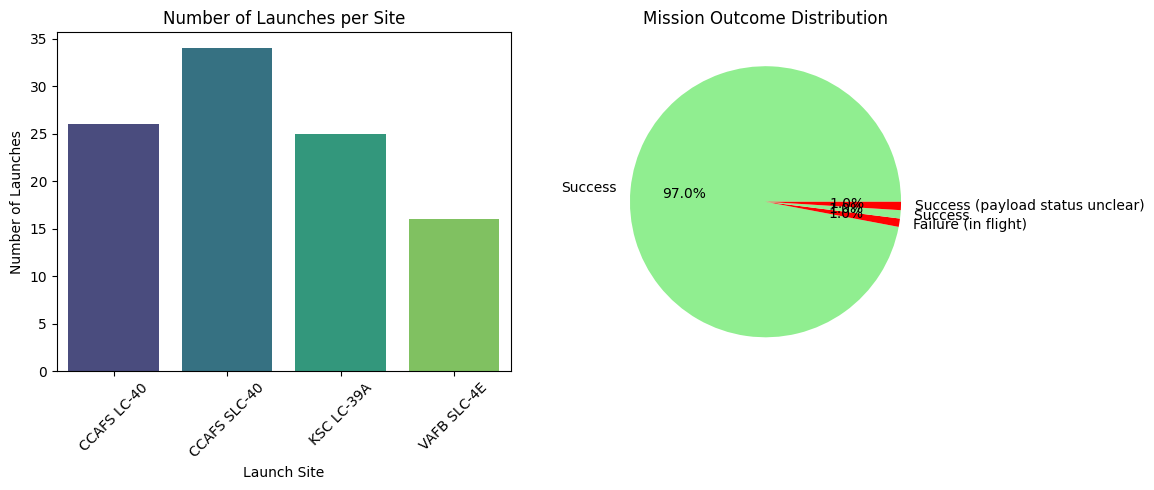

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create figure with two subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Bar plot (Launch Site)
launch_counts = df['Launch_Site'].value_counts()
sns.barplot(x=launch_counts.index, y=launch_counts.values, hue=launch_counts.index, palette="viridis", ax=axes[0], legend=False)
axes[0].set_xlabel("Launch Site")
axes[0].set_ylabel("Number of Launches")
axes[0].set_title("Number of Launches per Site")
axes[0].tick_params(axis='x', rotation=45)

# Pie chart (Mission Outcome)
mission_outcomes = df['Mission_Outcome'].value_counts()
axes[1].pie(mission_outcomes, labels=mission_outcomes.index, autopct='%1.1f%%', colors=['lightgreen', 'red'])
axes[1].set_title("Mission Outcome Distribution")

# Adjust layout
plt.tight_layout()
plt.show()

*SQL Queries for EDA* [Slide 8 - 9]

**Total launches per site**

SELECT LaunchSite, COUNT(*) AS LaunchCount  
FROM SPACEXTBL  
GROUP BY LaunchSite;

**Minimum and Maximum Payload Mass per Mission**

SELECT MIN(PAYLOAD_MASS__KG_) AS MinPayload, MAX(PAYLOAD_MASS__KG_) AS MaxPayload
FROM SPACEXTBL;

**Mission success rate for each booster version**

SELECT Booster_Version,
       COUNT(*) AS TotalMissions,
       SUM(CASE WHEN Mission_Outcome = 'Success' THEN 1 ELSE 0 END) * 100.0 / COUNT(*) AS SuccessRate
FROM SPACEXTBL
GROUP BY Booster_Version;

In [58]:
import sqlite3
import pandas as pd

# Create SQLite database in memory
conn = sqlite3.connect(":memory:")
cursor = conn.cursor()

# Load DataFrame into SQLite
df.to_sql("SPACEXTBL", conn, if_exists="replace", index=False)

# Query 1: Total launches per site
query1 = """
SELECT Launch_Site AS LaunchSite, COUNT(*) AS LaunchCount
FROM SPACEXTBL
GROUP BY Launch_Site
ORDER BY LaunchCount DESC;
"""
result1 = pd.read_sql_query(query1, conn)

# Query 2: Minimum & Maximum Payload Mass
query2 = """
SELECT
    MIN(PAYLOAD_MASS__KG_) AS MinPayloadMass,
    MAX(PAYLOAD_MASS__KG_) AS MaxPayloadMass
FROM SPACEXTBL;
"""
result2 = pd.read_sql_query(query2, conn)

# Query 3: Mission success rate per booster version
query3 = """
SELECT Booster_Version,
       COUNT(*) AS Total_Launches,
       SUM(CASE WHEN Mission_Outcome LIKE 'Success%' THEN 1 ELSE 0 END) * 100.0 / COUNT(*) AS SuccessRate
FROM SPACEXTBL
GROUP BY Booster_Version
ORDER BY SuccessRate DESC;
"""
result3 = pd.read_sql_query(query3, conn)

# Display Results Neatly
print("Total Launches per Site")
display(result1.style.set_properties(**{'text-align': 'center'}).set_table_styles([
    {'selector': 'th', 'props': [('background-color', '#40466e'), ('color', 'white'), ('font-weight', 'bold')]},
    {'selector': 'td', 'props': [('text-align', 'center')]},
]))

print("\nMinimum & Maximum Payload Mass")
display(result2.style.set_properties(**{'text-align': 'center'}).set_table_styles([
    {'selector': 'th', 'props': [('background-color', '#006d77'), ('color', 'white'), ('font-weight', 'bold')]},
    {'selector': 'td', 'props': [('text-align', 'center')]},
]))

print("\nMission Success Rate per Booster Version")
display(result3.style.set_properties(**{'text-align': 'center'}).set_table_styles([
    {'selector': 'th', 'props': [('background-color', '#0077b6'), ('color', 'white'), ('font-weight', 'bold')]},
    {'selector': 'td', 'props': [('text-align', 'center')]},
]))

# Close connection
conn.close()

Total Launches per Site


,LaunchSite,LaunchCount
0,CCAFS SLC-40,34
1,CCAFS LC-40,26
2,KSC LC-39A,25
3,VAFB SLC-4E,16



Minimum & Maximum Payload Mass


,MinPayloadMass,MaxPayloadMass
0,0,15600



Mission Success Rate per Booster Version


,Booster_Version,Total_Launches,SuccessRate
0,F9 v1.1 B1017,1,100.000000
1,F9 v1.1 B1016,1,100.000000
2,F9 v1.1 B1015,1,100.000000
3,F9 v1.1 B1014,1,100.000000
4,F9 v1.1 B1013,1,100.000000
5,F9 v1.1 B1012,1,100.000000
6,F9 v1.1 B1011,1,100.000000
7,F9 v1.1 B1010,1,100.000000
8,F9 v1.1 B1003,1,100.000000
9,F9 v1.1,5,100.000000


Interactive Maps (Folium) [Slide 10 - 11]

In [64]:
import folium

# Define map center (Cape Canaveral, Florida)
map_center = [28.563, -80.576]

# Create Folium map
spacex_map = folium.Map(location=map_center, zoom_start=6, tiles="OpenStreetMap")

# Dictionary of launch sites with coordinates
launch_sites = {
    "CCAFS LC-40": [28.5623, -80.5774],
    "KSC LC-39A": [28.5733, -80.6469],
    "VAFB SLC-4E": [34.6321, -120.6106],
    "CCAFS SLC-40": [28.5619, -80.5773]
}

# Add markers for each launch site
for site, coords in launch_sites.items():
    folium.Marker(
        location=coords,
        popup=site,
        icon=folium.Icon(color="blue", icon="info-sign")
    ).add_to(spacex_map)

# Display the map
spacex_map

Interactive Visual Analytics (Plotly Dash) [Slide 12 - 13]

In [65]:
import plotly.express as px

# Create scatter plot using the correct column names
fig = px.scatter(df,
                 x='PAYLOAD_MASS__KG_',
                 y='Landing__Outcome',
                 color='Launch_Site',
                 title='Payload Mass vs Landing Success',
                 labels={'PAYLOAD_MASS__KG_': 'Payload Mass (kg)', 'Landing__Outcome': 'Landing Success'})

fig.show()

Predictive Analysis (Decision Tree Classifier) [Slide 14 - 15]

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Prepare data with correct column names
X = df[['PAYLOAD_MASS__KG_']]  # Adjust this based on valid columns
y = df['Mission_Outcome'].apply(lambda x: 1 if 'Success' in x else 0)  # Convert outcome to binary

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Decision Tree model
clf = DecisionTreeClassifier(max_depth=4, random_state=42)
clf.fit(X_train, y_train)

# Predict and evaluate accuracy
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Decision Tree Accuracy: {accuracy * 100:.2f}%")

Decision Tree Accuracy: 95.24%


Hyperparameter Tuning (Decision Tree) [Slide 16 - 17]

In [73]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Rename columns if needed
df.rename(columns={'PAYLOAD_MASS__KG_': 'PayloadMass'}, inplace=True)  # Adjust if needed

# Select Features that Exist in the Dataset
selected_features = ['PayloadMass']  # Adjust based on actual column names

# Ensure columns exist before proceeding
df = df.dropna(subset=selected_features)  # Remove rows with missing values

# Define Target Variable (Convert Mission_Outcome to Binary)
y = df['Mission_Outcome'].apply(lambda x: 1 if 'Success' in x else 0)

# Split Data into Training and Test Sets
X_train, X_test, y_train, y_test = train_test_split(df[selected_features], y, test_size=0.2, random_state=42)

# Define Parameter Grid for Tuning
param_grid = {'max_depth': [2, 4, 6, 8, 10], 'criterion': ['gini', 'entropy']}

# Perform Grid Search with Cross-Validation
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Display Best Parameters and Accuracy
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy: {:.2f}%".format(grid_search.best_score_ * 100))

# Train Decision Tree with Best Parameters
best_model = DecisionTreeClassifier(**grid_search.best_params_)
best_model.fit(X_train, y_train)

# Evaluate on Test Data
y_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy: {:.2f}%".format(test_accuracy * 100))


Best Parameters: {'criterion': 'gini', 'max_depth': 2}
Best Accuracy: 100.00%
Test Accuracy: 95.24%


SVM Model (Support Vector Machine) [Slide 18 - 19]

In [93]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.utils import resample

# Load dataset from GitHub
url = 'https://raw.githubusercontent.com/chuksoo/IBM-Data-Science-Capstone-SpaceX/main/Spacex.csv'
df = pd.read_csv(url)

# Clean column names (remove spaces)
df.columns = df.columns.str.strip().str.replace(' ', '_')

# ✅ Select Features that Exist in the Dataset
selected_features = ['PAYLOAD_MASS__KG_']  # Adjust based on actual column names

# ✅ Drop rows with missing values in selected features
df = df.dropna(subset=selected_features)

# ✅ Ensure only "Success" and "Failure" mission outcomes exist
df = df[df['Mission_Outcome'].str.contains('Success|Failure', na=False)]

# ✅ Check if there are valid entries for "Mission_Outcome"
if df.empty:
    print("⚠️ Dataset is empty after filtering for 'Success' and 'Failure'. Please check the data.")
else:
    # ✅ Convert Mission_Outcome to binary (1 = Success, 0 = Failure)
    df['Mission_Outcome'] = df['Mission_Outcome'].apply(lambda x: 1 if 'Success' in x else 0)

    # ✅ Check class distribution
    class_counts = df['Mission_Outcome'].value_counts()
    print("Class distribution before balancing:\n", class_counts)

    # ✅ Handle class imbalance (Oversampling minority class)
    df_majority = df[df['Mission_Outcome'] == 1]
    df_minority = df[df['Mission_Outcome'] == 0]

    if df_minority.empty:
        print("⚠️ Warning: No failure cases found. Skipping oversampling.")
        df_balanced = df  # No balancing needed
    else:
        print("⚠️ Applying oversampling to balance the dataset...")
        df_minority_resampled = resample(
            df_minority,
            replace=True,
            n_samples=len(df_majority),  # Match majority class count
            random_state=42
        )
        df_balanced = pd.concat([df_majority, df_minority_resampled])

    # ✅ Check new class distribution
    print("Class distribution after balancing:\n", df_balanced['Mission_Outcome'].value_counts())

    # ✅ Define features & target
    X = df_balanced[selected_features]
    y = df_balanced['Mission_Outcome']

    # ✅ Ensure y has both classes before stratifying
    if len(y.unique()) > 1:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

        # ✅ Try different SVM kernels and compare accuracy
        kernels = ['linear', 'rbf', 'sigmoid']
        best_kernel = None
        best_accuracy = 0

        for kernel in kernels:
            model = SVC(kernel=kernel)
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            acc = accuracy_score(y_test, y_pred)

            print(f"SVM Kernel: {kernel}, Accuracy: {acc * 100:.2f}%")

            # Track the best-performing kernel
            if acc > best_accuracy:
                best_accuracy = acc
                best_kernel = kernel

        # ✅ Display the best-performing kernel
        print(f"\nBest-performing kernel: {best_kernel}, Accuracy: {best_accuracy * 100:.2f}%")
    else:
        print("⚠️ Not enough class diversity for training after filtering.")


Class distribution before balancing:
 Mission_Outcome
1    100
0      1
Name: count, dtype: int64
⚠️ Applying oversampling to balance the dataset...
Class distribution after balancing:
 Mission_Outcome
1    100
0    100
Name: count, dtype: int64
SVM Kernel: linear, Accuracy: 82.50%
SVM Kernel: rbf, Accuracy: 82.50%
SVM Kernel: sigmoid, Accuracy: 65.00%

Best-performing kernel: linear, Accuracy: 82.50%


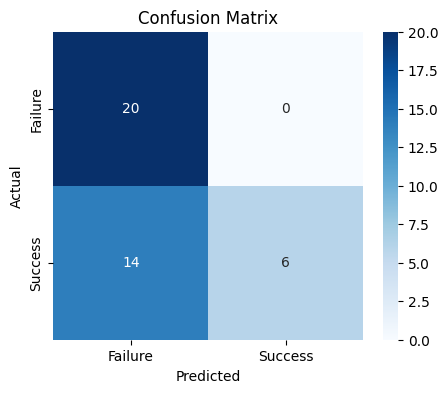


Classification Report:

+--------------+-------------+----------+------------+-----------+
|              |   precision |   recall |   f1-score |   support |
+==============+=============+==========+============+===========+
| 0            |        0.59 |     1.00 |       0.74 |     20.00 |
+--------------+-------------+----------+------------+-----------+
| 1            |        1.00 |     0.30 |       0.46 |     20.00 |
+--------------+-------------+----------+------------+-----------+
| accuracy     |        0.65 |     0.65 |       0.65 |      0.65 |
+--------------+-------------+----------+------------+-----------+
| macro avg    |        0.79 |     0.65 |       0.60 |     40.00 |
+--------------+-------------+----------+------------+-----------+
| weighted avg |        0.79 |     0.65 |       0.60 |     40.00 |
+--------------+-------------+----------+------------+-----------+


In [95]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from tabulate import tabulate

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix as heatmap
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Failure", "Success"], yticklabels=["Failure", "Success"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Get classification report as a dictionary
report_dict = classification_report(y_test, y_pred, output_dict=True)

# Convert to DataFrame
report_df = pd.DataFrame(report_dict).transpose()

# Format table output
print("\nClassification Report:\n")
print(tabulate(report_df, headers="keys", tablefmt="grid", floatfmt=".2f"))
